In [1]:
import pandas as pd
import numpy as np
import lifelines as ll
import sksurv as sks
import matplotlib.pyplot as plt
from bart_survival import surv_bart as sb
from bart_survival import simulation as sm
import lifelines as ll
from lifelines import KaplanMeierFitter
import subprocess
import importlib

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
import _functions1 as fn
from _conditions1 import *

In [17]:
SPLIT_RULES =  [
    "pmb.ContinuousSplitRule()", 
    # "pmb.ContinuousSplitRule()", 
    "pmb.OneHotSplitRule()"
]
model_dict = {"trees": 25,
    "split_rules": SPLIT_RULES
}
sampler_dict = {
            "draws": 100,
            "tune": 10,
            "cores": 6,
            "chains": 6,
            "compute_convergence_checks": False
        }

In [380]:

importlib.reload(fn)

<module '_functions1' from '/home/twj8/projects/bart_survival_paper/notebook/_functions1.py'>

In [21]:
meta, sv_true, k_sv, pb_sv, r_sv = fn.sim_2s(103, 100, simple_2_2, SPLIT_RULES, model_dict, sampler_dict)
# k = fn.sim_2s(100, 100, simple_2_1, SPLIT_RULES, model_dict, sampler_dict)

mean shape 1.07
mean scale 3.0669999999999997
mean time draws 3.352094597122493
cens mean 2.55
(176, 2)


Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 176, 2, 12
y1,yn: 0.000000, 0.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 5 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.554049
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167


In [237]:
importlib.reload(fn)

<module '_functions1' from '/home/twj8/projects/bart_survival_paper/notebook/_functions1.py'>

In [236]:
q = fn.sim_2s(3, 100, simple_2_1, SPLIT_RULES, model_dict, sampler_dict)


mean shape 1.07
mean scale 3.0669999999999997
mean time draws 2.9336320953037234
cens mean 11.6


(array([ 1,  3,  5,  8, 10]), array([0, 2, 4, 7, 9]))

In [127]:
meta_lst = []
sv_true_lst0 = []
k_sv_lst0 = []
k_sv_ci_lst0 = []
pb_sv_lst0 = []
pb_sv_ci_lst0 = []
r_sv_lst0 = []
r_sv_ci_lst0 = []

sv_true_lst1 = []
k_sv_lst1 = []
k_sv_ci_lst1 = []
pb_sv_lst1 = []
pb_sv_ci_lst1 = []
r_sv_lst1 = []
r_sv_ci_lst1 = []

for i in range(10):
    meta, sv_true, k_sv, pb_sv, r_sv = fn.sim_2s(i, 100, simple_2_1, SPLIT_RULES, model_dict, sampler_dict)
    
    uniq_t = meta[3][0]
    uniq_idx = meta[3][1]

    true_t = meta[1]
    assert((true_t[uniq_t-1] == uniq_t).all)

    sv_t_0 = sv_true[0][uniq_t-1]
    sv_t_1 = sv_true[1][uniq_t-1]

    k_sv_0 = k_sv[0][0][uniq_idx]
    k_sv_1 = k_sv[1][0][uniq_idx]
    k_sv_ci0 = k_sv[0][1][:,uniq_idx]
    k_sv_ci1 = k_sv[1][1][:,uniq_idx]

    p_sv_0 = pb_sv[0][0][uniq_idx]
    p_sv_1 = pb_sv[1][0][uniq_idx]
    p_sv_ci0 = pb_sv[0][1][:,uniq_idx]
    p_sv_ci1 = pb_sv[1][1][:,uniq_idx]

    r_sv_0 = r_sv[0][0][uniq_idx]
    r_sv_1 = r_sv[1][0][uniq_idx]
    r_sv_ci0 = r_sv[0][1][:,uniq_idx]
    r_sv_ci1 = r_sv[1][1][:,uniq_idx]

    meta_lst.append(meta)
    sv_true_lst0.append(sv_t_0)
    k_sv_lst0.append(k_sv_0)
    k_sv_ci_lst0.append(k_sv_ci0)
    pb_sv_lst0.append(p_sv_0)
    pb_sv_ci_lst0.append(p_sv_ci0)
    r_sv_lst0.append(r_sv_0)
    r_sv_ci_lst0.append(r_sv_ci0)
    sv_true_lst1.append(sv_t_1)
    k_sv_lst1.append(k_sv_1)
    k_sv_ci_lst1.append(k_sv_ci1)
    pb_sv_lst1.append(p_sv_1)
    pb_sv_ci_lst1.append(p_sv_ci1)
    r_sv_lst1.append(r_sv_1)
    r_sv_ci_lst1.append(r_sv_ci1)

mean shape 1.07
mean scale 3.0669999999999997
mean time draws 2.9296297973862475
cens mean 10.55
(266, 2)


Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 266, 2, 20
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.490104
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 1s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 272, 2, 22
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.488776
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.0669999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 7 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 312, 2, 24
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 11 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.67449
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 5 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 316, 2, 22
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 10 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.55006
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 5 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 267, 2, 18
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 8 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.482834
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 258, 2, 20
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.540072
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 285, 2, 20
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.529453
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 6 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 300, 2, 24
y1,yn: 0.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 11 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.643345
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.0669999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 9 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 297, 2, 16
y1,yn: 0.000000, 0.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 7 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.656062
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167
mean shape 1.07
mean scale 3.06699999

Only 100 samples in chain.
Multiprocess sampling (6 chains in 6 jobs)
PGBART: [f]


Sampling 6 chains for 10 tune and 100 draw iterations (60 + 600 draws total) took 8 seconds.
Sampling: [f]


Loading required package: nlme
Loading required package: nnet
Loading required package: survival


[1] "/home/twj8/projects/bart_survival_paper/notebook"
*****Calling gbart: type=2
*****Data:
data:n,p,np: 262, 2, 20
y1,yn: 1.000000, 1.000000
x1,x[n*p]: 1.000000, 0.000000
xp1,xp[np*p]: 1.000000, 1.000000
*****Number of Trees: 50
*****Number of Cut Points: 9 ... 1
*****burn,nd,thin: 250,1670,10
*****Prior:beta,alpha,tau,nu,lambda,offset: 2,0.95,0.212132,3,1,-0.564345
*****Dirichlet:sparse,theta,omega,a,b,rho,augment: 0,0,1,0.5,1,2,0
*****printevery: 100

MCMC
done 0 (out of 1920)
done 100 (out of 1920)
done 200 (out of 1920)
done 300 (out of 1920)
done 400 (out of 1920)
done 500 (out of 1920)
done 600 (out of 1920)
done 700 (out of 1920)
done 800 (out of 1920)
done 900 (out of 1920)
done 1000 (out of 1920)
done 1100 (out of 1920)
done 1200 (out of 1920)
done 1300 (out of 1920)
done 1400 (out of 1920)
done 1500 (out of 1920)
done 1600 (out of 1920)
done 1700 (out of 1920)
done 1800 (out of 1920)
done 1900 (out of 1920)
time: 2s
trcnt,tecnt: 167,167


In [228]:
k, p, r = fn.get_metrics2(
    sv_true_lst0, sv_true_lst1,
    k_sv_lst0, k_sv_lst1,
    k_sv_ci_lst0, k_sv_ci_lst1,
    pb_sv_lst0, pb_sv_lst1,
    pb_sv_ci_lst0, pb_sv_ci_lst1,
    r_sv_lst0, r_sv_lst1,
    r_sv_ci_lst0, r_sv_ci_lst1
)

In [230]:
r

{'rmse': array([0.07258913, 0.08262077, 0.05198572, 0.03356208, 0.02971822]),
 'bias': array([ 1.20937248e-02, -3.08097739e-03,  7.95616025e-03,  3.47056996e-03,
         6.35450355e-05]),
 'cov': array([0.9 , 0.85, 0.95, 0.95, 0.9 ]),
 'ivl': array([0.22018502, 0.24808669, 0.20972683, 0.14971771, 0.10672575])}

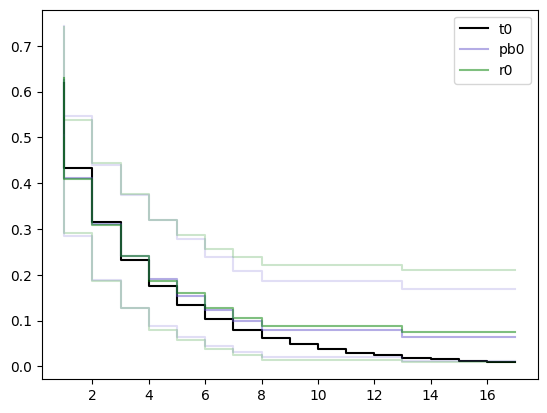

In [226]:
p0 = True
p1 = False
p0_k = False
p1_k = False
p0_p = True
p1_p = False
p0_r = True
p1_r = False


ttt = meta[1]
t = meta[2]
# true
if p0:
    plt.step(ttt, sv_true[0], color="black", label="t0")
if p1:
    plt.step(ttt, sv_true[1], color="grey", label="t1")

#kpm
if p0_k:
    plt.step(t, k_sv[0][0], color = "rosybrown", label = "k0", alpha=0.8)
    plt.step(t, k_sv[0][1][0], color = "rosybrown", alpha=0.2)
    plt.step(t, k_sv[0][1][1], color = "rosybrown", alpha=0.2)
if p1_k:
    plt.step(t, k_sv[1][0], color = "coral", label = "k1", alpha=0.8)
    plt.step(t, k_sv[1][1][0], color = "coral",  alpha=0.2)
    plt.step(t, k_sv[1][1][1], color = "coral",  alpha=0.2)

# pb
if p0_p:
    plt.step(t, pb_sv[0][0], label="pb0", color = "slateblue", alpha=0.5)
    plt.step(t, pb_sv[0][1][0], color = "slateblue", alpha=0.2)
    plt.step(t, pb_sv[0][1][1], color = "slateblue", alpha=0.2)
if p1_p:
    plt.step(t, pb_sv[1][0], label="pb1", color = "blue", alpha=0.5)
    plt.step(t, pb_sv[1][1][0], color = "blue", alpha=0.2)
    plt.step(t, pb_sv[1][1][1], color = "blue", alpha=0.2)

# #rb
if p0_r:
    plt.step(t, r_sv[0][0], color="green", label="r0", alpha=0.5)
    plt.step(t, r_sv[0][1][0], color="green",  alpha=0.2)
    plt.step(t, r_sv[0][1][1], color="green",  alpha=0.2)
if p1_r:
    plt.step(t, r_sv[1][0], color="forestgreen", label="r1", alpha=0.5)
    plt.step(t, r_sv[1][1][0], color="forestgreen",  alpha=0.2)
    plt.step(t, r_sv[1][1][1], color="forestgreen", alpha=0.2)

plt.legend()
    

# todo
- need to fix the kpm to be balanced preds
- need to do the rbart
  - Rbart and pybart are aligned

In [26]:
sv_true
x_vals = np.unique(x_mat)
x_vals


array([0., 1.])

# Functions

## Simulation Functions

2 cens
3 smpl
5 times
== 30 total scenarios

In [2]:
rng = np.random.default_rng(99)

There is no good way to predetermine censoring. Lower cens_scale == > cens percent. 4 is generally around 20%, .5 generally around 50% censored.
Trial to find

In [2]:
# cns = []
# for i in range(0,1000):
#     event_dict, sv_true, sv_scale_true = sm.simulate_survival(
#         x_mat = x_mat,
#         scale_f="2.5*x_mat[:,0]",
#         shape_f=".8",
#         cens_scale=3.3,
#         rng = rng
#     )
#     # print(event_dict["cens_percentage"])
#     cns.append(event_dict["status"][event_dict["status"]==0].shape[0]/event_dict["status"].shape[0])

In [6]:
simple_1_1

{'type': 'Simple, 1 group, 50% cens',
 'x_vars': 1,
 'VAR_CLASS': [2],
 'VAR_PROB': [1],
 'scale_f': '2.5*x_mat[:,0]',
 'shape_f': '.8',
 'cens_scale': 3.3}

In [137]:
SPLIT_RULES =  [
    "pmb.ContinuousSplitRule()", 
    # "pmb.OneHotSplitRule()"
]
model_dict = {"trees": 10,
    "split_rules": SPLIT_RULES
}
sampler_dict = {
            "draws": 200,
            "tune": 30,
            "cores": 6,
            "chains": 6,
            "compute_convergence_checks": False
        }

In [1]:
# i_lst = []
# sv_true_r1_lst = [] 
# cens_perc_lst = []
# uniq_t_lst = []
# qnt_t_lst = []

# k_cov_lst = []
# pb_cov_lst = []
# r_cov_lst = []
# k_ci_l_lst = []
# pb_ci_l_lst = []
# r_ci_l_lst = []
# k_rmse_lst = []
# pb_rmse_lst = []
# r_rmse_lst = []
# k_bias_lst = [] 
# pb_bias_lst = []
# r_bias_lst = []

# for i in range(1):
#     print(i)
#     i_lst.append(i)
#     sv_true, cens_perc, uniq_t, qnt_t, qnt_idx, sv_true_r1, k_sv_m, k_sv_q, pb_sv_m, pb_sv_q, r_sv_m, r_sv_q = sim_1s(seed=i, n=N[0], scenario=simple_1_1, SPLIT_RULES=SPLIT_RULES, model_dict=model_dict, sampler_dict=sampler_dict)
#     cens_perc_lst.append(cens_perc)
#     uniq_t_lst.append(uniq_t)
#     qnt_t_lst.append(qnt_t)

#     k_cov, pb_cov, r_cov, k_ci_l, pb_ci_l, r_ci_l, k_rmse, pb_rmse, r_rmse, k_bias, pb_bias, r_bias = get_metrics(
#         sv_true_r1,
#         qnt_t, qnt_idx,
#         k_sv_m, k_sv_q,
#         pb_sv_m, pb_sv_q,
#         r_sv_m, r_sv_q
#     )
#     k_cov_lst.append(k_cov)
#     pb_cov_lst.append(pb_cov)
#     r_cov_lst.append(r_cov)
#     k_ci_l_lst.append(k_ci_l)
#     pb_ci_l_lst.append(pb_ci_l)
#     r_ci_l_lst.append(r_ci_l)
#     k_rmse_lst.append(k_rmse)
#     pb_rmse_lst.append(pb_rmse)
#     r_rmse_lst.append(r_rmse)
#     k_bias_lst.append(k_bias)
#     pb_bias_lst.append(pb_bias)
#     r_bias_lst.append(r_bias)
    

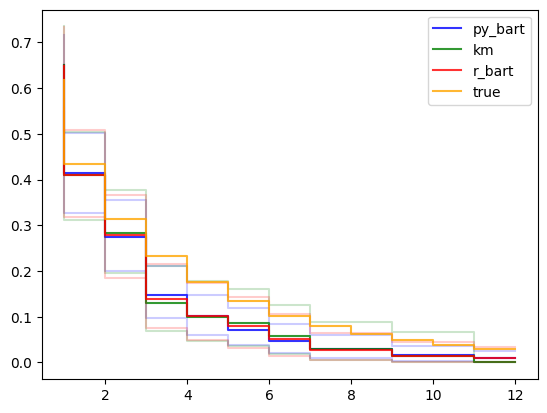

In [91]:

# ttt = np.arange(1, svv.shape[0]+1)
ttt = uniq_t
plt.step(ttt,pb_sv_m, color = "blue", alpha=0.8, label = "py_bart")
plt.step(ttt, pb_sv_q[0,:], color="blue", alpha=0.2,)
plt.step(ttt, pb_sv_q[1,:], color="blue", alpha=0.2)
plt.step(ttt, k_sv_m, color="green", alpha=0.8, label="km")
plt.step(ttt, k_sv_q[0,:], color="green", alpha=0.2)
plt.step(ttt, k_sv_q[1,:], color="green", alpha=0.2)
plt.step(ttt, r_sv_m, color = "red", alpha=0.8, label="r_bart")
plt.step(ttt, r_sv_q[0,:], color = "red", alpha=0.2)
plt.step(ttt, r_sv_q[1,:], color = "red", alpha=0.2)

plt.step(sv_true["true_times"], sv_true["sv_true"].mean(0), color = "orange", alpha=0.8, label="true")
plt.legend()
